# SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Part 1

### （a）

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


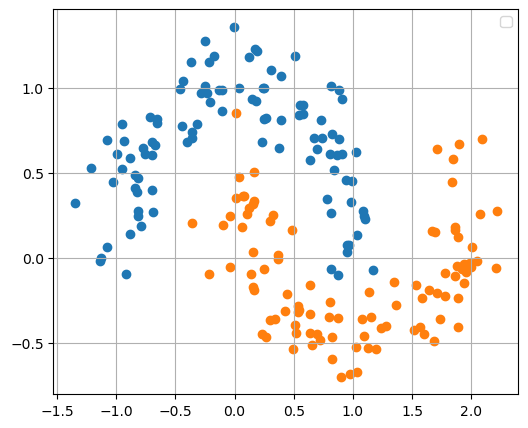

In [18]:
n = 200
plt.figure(figsize=(6, 5))
X, y = datasets.make_moons(n_samples = n, noise = 0.15, random_state = 42)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.grid(True)
plt.legend()
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=136)

In [19]:
X,y= X_train, y_train

### (b)

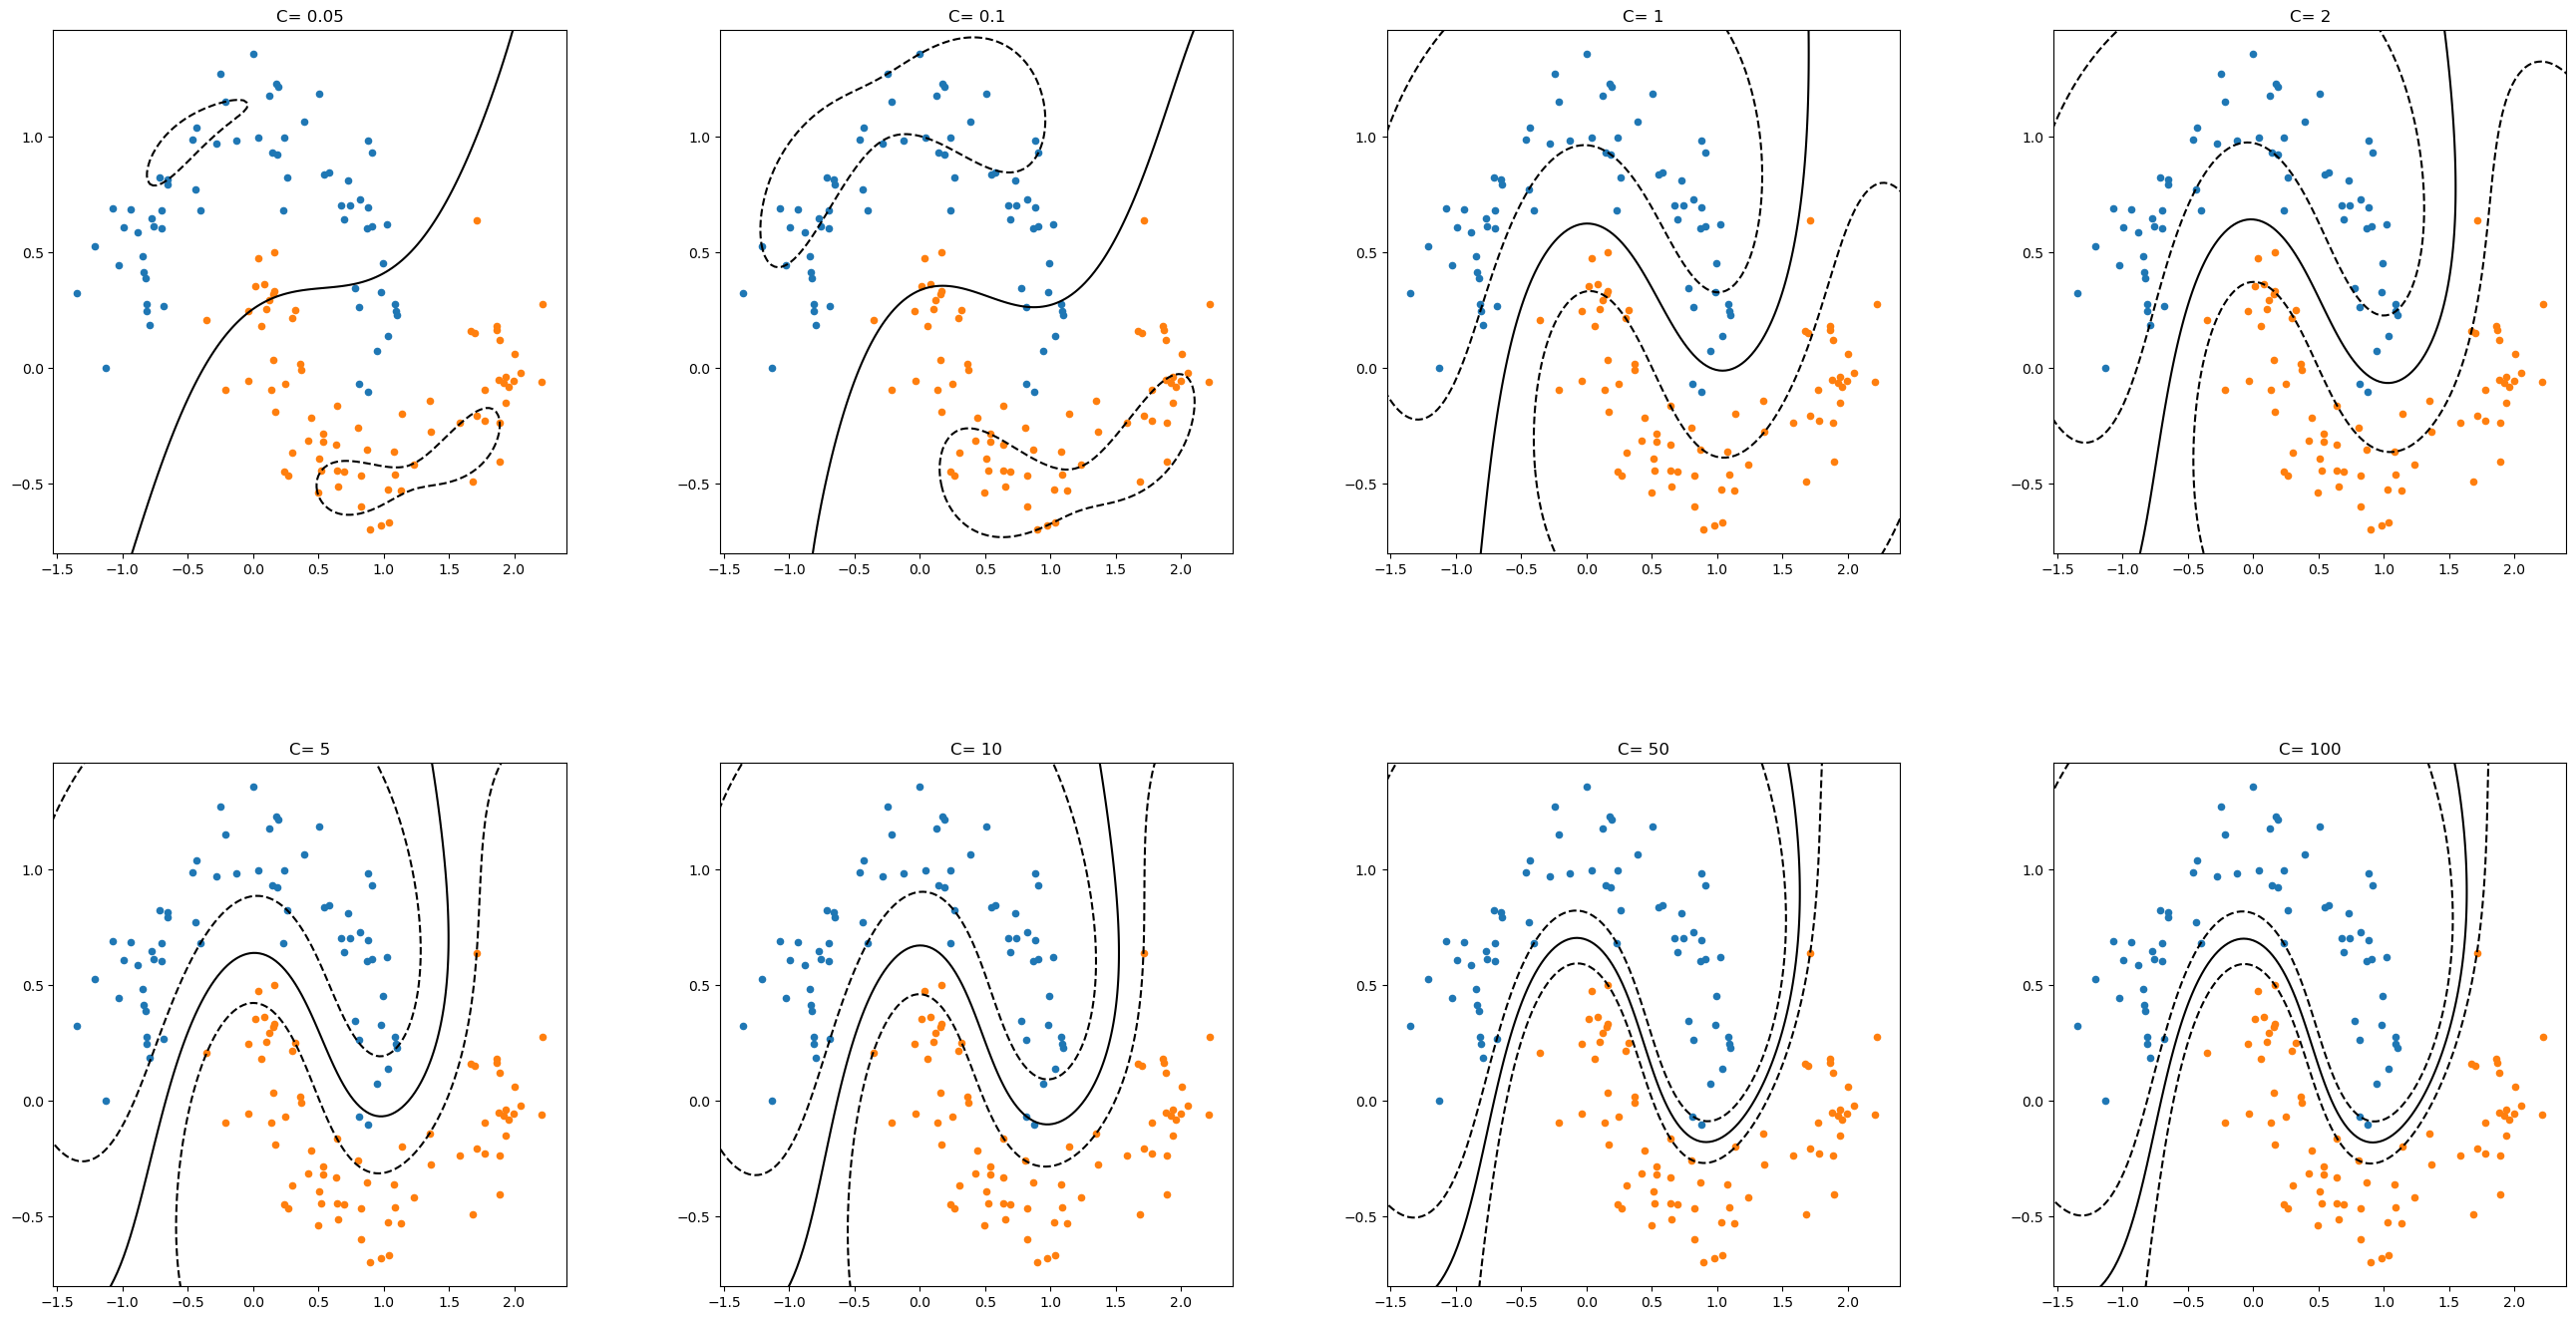

In [20]:
fig, axs = plt.subplots(2,4)
fig.set_size_inches(18, 9)
count=0
c_values = [0.05,0.1,1,2,5,10,50,100]
for i in range (2):
    for j in range(4):
        clf = svm.SVC(C=c_values[count])
        clf.fit(X, y)
        axs[i,j].scatter(X[:, 0][y == 0], X[:, 1][y == 0],s=20)
        axs[i,j].scatter(X[:, 0][y == 1], X[:, 1][y == 1],s=20)
        xlim = axs[i,j].get_xlim() 
        ylim = axs[i,j].get_ylim()
        x_min, x_max = xlim[0]-0.5, xlim[1]+0.5
        y_min, y_max = ylim[0]-0.5, ylim[1]+0.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        xy = np.c_[XX.ravel(), YY.ravel()]
        Z = clf.decision_function(xy).reshape(XX.shape)
        axs[i,j].contour(XX, YY, Z, colors=['k','k','k'], alpha=1, levels=[-1,0,1],linestyles=['--', '-', '--'])
        axs[i,j].set_title("C= "+str(c_values[count]))
        axs[i,j].set_xlim(xlim)
        axs[i,j].set_ylim(ylim)
        count = count + 1
fig.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5,wspace=0.3,hspace=0.4)

### When C becomes larger, the decision boundary becomes more accurate

### (c)

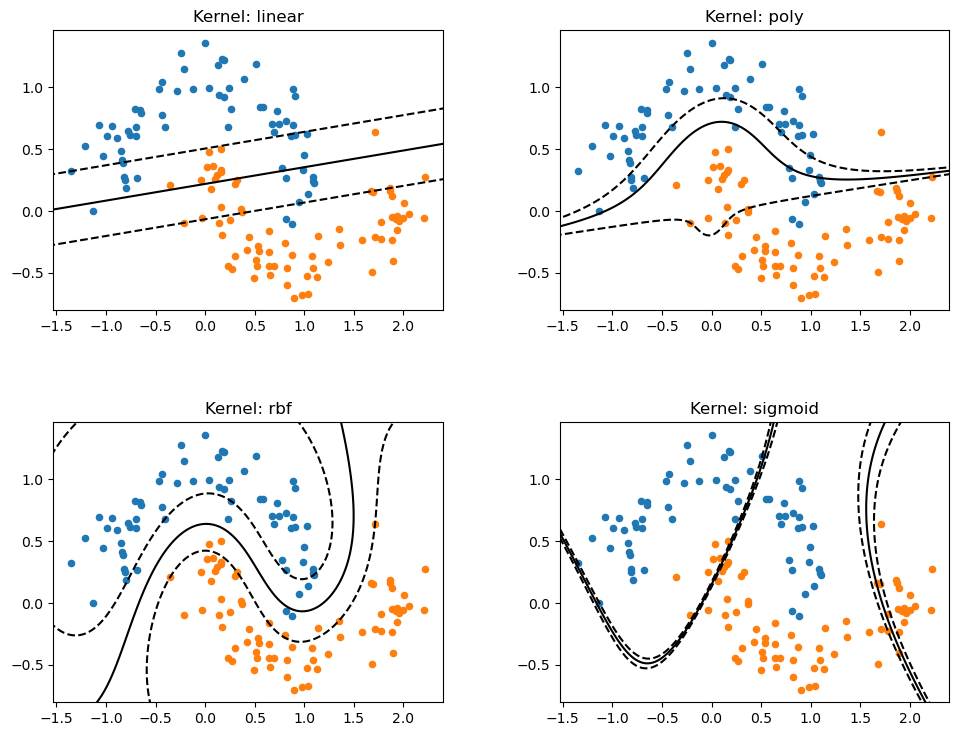

In [21]:
fig, axs = plt.subplots(2,2)
kernel=["linear", "poly", "rbf", "sigmoid"]
count=0
for i in range (2):
    for j in range(2):
        clf = svm.SVC(C=5,kernel=kernel[count])
        clf.fit(X, y)
        score = clf.score(X_test,y_test)
        mse = mean_squared_error(clf.predict(X_test),y_test)
        axs[i,j].scatter(X[:, 0][y == 0], X[:, 1][y == 0],s=20)
        axs[i,j].scatter(X[:, 0][y == 1], X[:, 1][y == 1],s=20)
        xlim = axs[i,j].get_xlim() 
        ylim = axs[i,j].get_ylim()
        x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
        y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        xy = np.c_[XX.ravel(), YY.ravel()]
        Z = clf.decision_function(xy).reshape(XX.shape)
        axs[i,j].contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
        axs[i,j].set_title("Kernel: "+str(kernel[count]))
        axs[i,j].set_xlim(xlim)
        axs[i,j].set_ylim(ylim)
        count = count + 1
fig.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5,wspace=0.3,hspace=0.4)

In [23]:
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
  clf = svm.SVC(kernel=kernel)
  clf.fit(X,y)
  y_pred = clf.predict(X)
  print(kernel, "Accuracy= ",metrics.accuracy_score(y, y_pred))

linear Accuracy=  0.85
poly Accuracy=  0.9285714285714286
rbf Accuracy=  0.9857142857142858
sigmoid Accuracy=  0.6857142857142857


# Part 2

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [4]:
# import the data
digtis = load_digits()
X = digtis.data
y = digtis.target

In [5]:
train_score=[]
test_score=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=215)

In [6]:
layers = list(range(5,300,5)) 
for i in layers:
   MLP = MLPClassifier(activation = 'logistic', solver = 'sgd', hidden_layer_sizes = (i,), 
                       alpha=0.01, max_iter = 500,learning_rate_init = 0.1)
   MLP.fit(X_train,y_train)
   test_score.append(MLP.score(X_test,y_test))
   train_score.append(MLP.score(X_train,y_train))

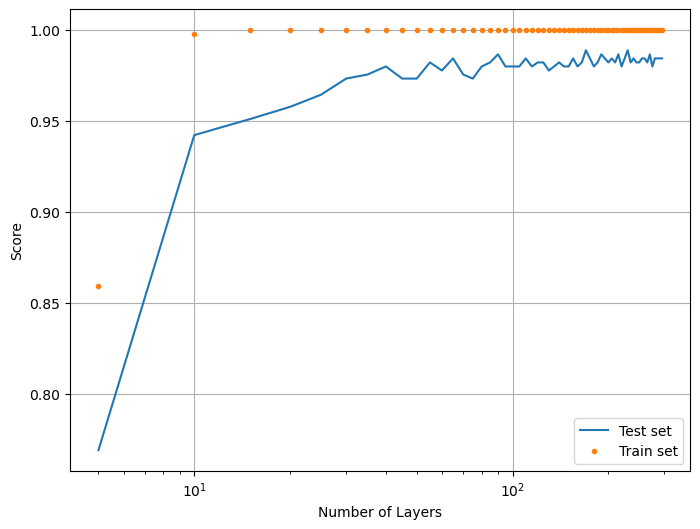

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(layers,test_score,'-',label = 'Test set')
plt.plot(layers,train_score,'.',label = 'Train set')
plt.xlabel('Number of Layers')
plt.xscale("log")
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()